## Bank Good Credit Prediction:

**Description:**
- Bank GoodCredit wants to predict cred score for current credit card customers.The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.
- In bank Goodcredit, banks consider and evaluate every loan application based on merits. They check the creditworthiness of every individual or entity to determine the level of risk that they subject themself by lending to an entity or individual.
- Clients with a high level of risk are less desirable since they present with a high likelihood of defaulting on their loan obligations. 
- Low-risk clients are more likely to get their loan applications approved since the lender considers them creditworthy.

**Database Information:**
- Customer Account Data (Table : Cust_Account): This table contains customer’s historical accounts data and payments history
- Customer Enquiry Data (Table : Cust_Enquiry): This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
- Demographics Data (Table : Cust_Demographics): Current customer applications with demographic data Note that demographics features are renamed as features and obscured in accordance with privacy policies.

**Project Goal:** Build a model with the data provided
1. Data exploration insights – what did you find and what decision
did you take?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

**Attribute Information:**

1.Customer_Account Table:
- dt_opened: Date when the account was opened.
- customer_no: Unique identifier for the customer.
- upload_dt: Date when data was uploaded.
- acct_type: Type of account.
- owner_indic: Indicator of account ownership.
- opened_dt: Date when the account was opened.
- last_paymt_dt: Date of the last payment made.
- closed_dt: Date when the account was closed.
- reporting_dt: Date when the account information was reported.
- high_credit_amt: Highest credit amount on the account.
- cur_balance_amt: Current balance amount on the account.
- amt_past_due: Amount past due on the account.
- paymenthistory1: Payment history data.
- paymenthistory2: Additional payment history data.
- paymt_str_dt: Start date of payment.
- paymt_end_dt: End date of payment.
- creditlimit: Credit limit on the account.
- cashlimit: Cash withdrawal limit on the account.
- rateofinterest: Interest rate associated with the account.
- paymentfrequency: Frequency of payments.
- actualpaymentamount: Actual payment amount made.

2.Enquiry Table
- dt_opened: Date when the account was opened.
- customer_no: Unique identifier for the customer.
- upload_dt: Date when data was uploaded.
- enquiry_dt: Date of the enquiry.
- enq_purpose: Purpose of the enquiry.
- enq_amt: Amount associated with the enquiry.


3.Customer Demographics Table
- dt_opened: Date when the account was opened.
- customer no: Unique identifier for the customer.
- entry_time: Time of data entry.
- feature_1 to feature_79: Various features or variables associated with the data.
- Bad_label: Label indicating whether the entry is classified as 0 – Customer has Good credit history 1 – Customer has Bad credit history

**Data Mining:**

- Data mining is the process of extracting valuable insights, patterns, and knowledge
from large datasets. When dealing with large databases comprising multiple tables, data mining techniques become essential for uncovering meaningful relationships and patterns that might not be immediately apparent. 
- Effective data mining in large databases requires careful preprocessing, feature engineering, and selection of appropriate algorithms to handle the scale and complexity of the data efficiently.
- In this database contains three tables,it becomes a large data,so we have to use data mining technique. it's take crucial records and features from the database.

**Buisness Case:**
Bank GoodCredit wants to predict cred score for current credit card
customers. The cred score will denote a customer’s credit worthiness
and help the bank in reducing credit default risk.

Target variable → Bad_label
- 0 – Customer has Good credit history
- 1 – Customer has Bad credit history

*Importing required packages:*

In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Database - project_banking;
connection=mysql.connector.connect(host ="18.136.157.135",
                                   user="dm_team1",
                                   password="DM!$Team&279@20!")

In [3]:
# Check the number of databases available on the server;
cursor = connection.cursor()
cursor.execute("show databases") 
for  i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
connection=mysql.connector.connect(host ="18.136.157.135",
                                   user="dm_team1",
                                   password="DM!$Team&279@20!",
                                   database='project_banking')

In [5]:
import warnings as wn
wn.filterwarnings("ignore")

In [6]:
tables = pd.read_sql_query("show tables",connection)
tables

,Tables_in_project_banking
0,Cust_Account
1,Cust_Demographics
2,Cust_Enquiry


*Customer Account Data:*

In [7]:
acc_query = "select*from Cust_Account"
cus_acc = pd.read_sql_query(acc_query,connection)
pd.set_option("display.max_columns",None)
cus_acc.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [8]:
cus_acc.shape

(186329, 21)

In [9]:
cus_acc_col = ['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','cashlimit','creditlimit']
cus_acc_data = cus_acc.loc[:,cus_acc_col]
cus_acc_data.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,12265,20900,0,,,
1,12265,16201,10390,,1400,14000
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,


In [10]:
cus_acc_group = cus_acc_data.groupby(["customer_no"])
cus_acc_group.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,12265,20900,0,,,
1,12265,16201,10390,,1400,14000
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,
...,...,...,...,...,...,...
186317,1611,97741,0,,,
186318,1611,300000,287017,,,
186319,1611,34001,0,,,
186320,1611,42320,0,,,42490


In [11]:
acc_data = pd.DataFrame(cus_acc_group.sum()).reset_index()
acc_data.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,243000,405000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,980017700,300009800059000
3,1000,548289548289147688,31349029113,,6750081000,225000270000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,10000,60000


In [12]:
acc_data.to_csv("Cust_Acc_Data.csv",index=False)
print(acc_data.shape)

(23896, 6)


*Customer Demographics Data:*

In [13]:
demo_query = "select*from Cust_Demographics"
cus_demo = pd.read_sql_query(demo_query,connection)
pd.set_option("display.max_columns",None)
cus_demo.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [14]:
cus_demo.shape

(23896, 83)

*Customer Enquiry Data:*

In [15]:
enqu_query = "select*from Cust_Enquiry"
cus_enqu = pd.read_sql_query(enqu_query,connection)
pd.set_option("display.max_columns",None)
cus_enqu.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


In [16]:
cus_enqu.shape

(413188, 6)

In [17]:
cus_enqu.to_csv("Cust_Enquiry",index=False)
cus_enqu = pd.read_csv("Cust_Enquiry")
cus_enqu.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0


In [18]:
cus_enqu_data = cus_enqu.loc[:,["customer_no","enq_amt"]]
cus_enqu_data.head()

,customer_no,enq_amt
0,1,3500000.0
1,1,500000.0
2,1,50000.0
3,1,50000.0
4,1,1000.0


In [19]:
cus_enqu_group = cus_enqu_data.groupby(["customer_no"])
cus_enqu_group.head(4)

,customer_no,enq_amt
0,1,3500000.0
1,1,500000.0
2,1,50000.0
3,1,50000.0
18,2,200000000.0
...,...,...
413167,23895,50000.0
413172,23896,10000.0
413173,23896,1000.0
413174,23896,15000.0


In [20]:
enqu_data_count = pd.DataFrame(cus_enqu_group.count()).reset_index()
enqu_data_count.columns = ["customer_no","total_enqu_count"]
enqu_data_count.head()

,customer_no,total_enqu_count
0,1,18
1,2,68
2,3,1
3,4,34
4,5,2


In [21]:
enquiry_data_amt=pd.DataFrame(cus_enqu_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head()

,customer_no,total_enq_amt
0,1,4.981150e+06
1,2,6.676682e+09
2,3,3.400000e+06
3,4,5.081000e+07
4,5,2.000000e+03


In [22]:
enqu_data = pd.merge(enqu_data_count,enquiry_data_amt,on="customer_no",how="inner")
enqu_data.head()

,customer_no,total_enqu_count,total_enq_amt
0,1,18,4.981150e+06
1,2,68,6.676682e+09
2,3,1,3.400000e+06
3,4,34,5.081000e+07
4,5,2,2.000000e+03


In [23]:
enqu_data.to_csv("cust_enqu_data.csv",index=False)

In [24]:
print(acc_data.shape)
print(cus_demo.shape)
print(enqu_data.shape)

(23896, 6)
(23896, 83)
(23896, 3)


In [25]:
data_merge=pd.merge(cus_demo,acc_data,on="customer_no",how="inner")
print(data_merge.shape)
data_merge.head()

(23896, 88)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,,1,1000000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,,23600010500020000,394000262000300000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,


In [26]:
data_final = pd.concat([data_merge,enqu_data],axis=1)
print(data_final.shape)
data_final.head()

(23896, 91)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit,customer_no,total_enqu_count,total_enq_amt
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000,1,18,4.981150e+06
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,,1,1000000,2,68,6.676682e+09
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,,3,1,3.400000e+06
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,,23600010500020000,394000262000300000,4,34,5.081000e+07
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,,5,2,2.000000e+03


In [27]:
data_final.to_csv("Bank_GoodCredit.csv")

**Data Loading:**

In [30]:
df = pd.read_csv("Bank_GoodCredit.csv")
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit,customer_no.1,total_enqu_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,168000,250000420000,1,18,4.981150e+06
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,NaN,1,1000000,2,68,6.676682e+09
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,NaN,3,1,3.400000e+06
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,NaN,23600010500020000,394000262000300000,4,34,5.081000e+07
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,NaN,5,2,2.000000e+03


In [31]:
df.tail()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit,customer_no.1,total_enqu_count,total_enq_amt
23891,23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA05,MA01,NaN,NaN,1.0,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2.0,0.0,Graduate,New Delhi,110045.0,1988.0,10.0,Paren,Y,1.0,33000.0,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015.0,6.0,0.0,6.0,Gurgaon,122001.0,NaN,PAN Card,CUQPSXXXXX,NaN,NaN,Y,State Bank of India,99000.0,01-Jan-15,17-Jun-16,1.0,10.0,Y,N,Y,N,NaN,Y,1988-10,10.0,157.0,110045.0,0.0,1.0,33000.0,0-0,13.0,R,Y,NaN,0000-00-00,0.0,XXXXX,1.0,N,0,1500004108218500088626132761834010000010000036...,14694311646162680648430009911300,NaN,1000029700,5000099000,23892,16,1570344.0
23892,23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,NaN,NaN,2.0,Card Setup,14.0,35000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA03,AS33,NaN,NaN,1.0,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2.0,0.0,Graduate,New Delhi,110037.0,2014.0,12.0,Rente,N,1.0,1.0,Private Ltd. Co.,Others,ENGINEER,2012.0,12.0,3.0,0.0,New Delhi,110037.0,@GMAIL.COM,PAN Card,DTPPSXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,N,N,Y,N,NaN,Y,2014-12,33.0,102.0,282001.0,1.0,1.0,1.0,0-0,10.0,O,Y,NaN,0000-00-00,0.0,99101XXXXX,1.0,N,0,27314,16393,NaN,NaN,NaN,23893,12,239010.0
23893,23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748.0,3.0,Card Setup,14.0,68000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,CD01,D066,NaN,NaN,1.0,CPOPSXXXXX,08-Nov-86,99111XXXXX,Y,@GMAIL.COM,2.0,0.0,Graduate,New Delhi,110033.0,1986.0,0.0,Paren,Y,1.0,1.0,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015.0,1.0,3.0,0.0,Gurgaon,122016.0,@ACCRETIVEHEALTH.COM,PAN Card,CPOPSXXXXX,NaN,NaN,Y,HDFC Bank,52000.0,01-Sep-14,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,1986-0,10.0,157.0,110033.0,0.0,1.0,1.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,99111XXXXX,1.0,N,0,149402050013401,207700,NaN,7000,14000,23894,4,102000.0
23894,23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740.0,3.0,Card Setup,14.0,158000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA40,G011,NaN,NaN,1.0,AVZPGXXXXX,24-Nov-82,93100XXXXX,N,@GMAIL.COM,1.0,0.0,Graduate,New Delhi,110095.0,2010.0,0.0,Self,Y,2.0,25000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,New Delhi,110095.0,NaN,PAN Card,AVZPGXXXXX,NaN,NaN,Y,Citibank N.A.,65000.0,01-Apr-14,17-Jun-16,2.0,10.0,NaN,N,Y,N,NaN,Y,2010-0,10.0,157.0,110095.0,0.0,2.0,25000.0,03-May,10.0,R,NaN,NaN,0000-00-00,0.0,93100XXXXX,1.0,N,0,91873370504000006409211900034000,1707659253296561161764840,NaN,2970010000,9900065000,23895,8,727000.0
23895,23895,04-Dec-15,23896,06-Nov-15,Titanium Deligh,06-Nov-15,688.0,1.0,Card Setup,14.0,106000.0,NaN,NaN,NaN,Y,TD1,NaN,0.0,SA03,AS33,NaN,NaN,1.0,AJIPBXXXXX,15-Aug-83,97178XXXXX,N,@GMAIL.COM,1.0,0.0,Graduate,Ghaziabad,201005.0,2005.0,0.0,Paren,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Ghaziabad,201005.0,NaN,PAN Card,AJIPBXXXXX,NaN,NaN,Y,State Bank of India,106000.0,01-Feb-15,17-Jun-16,1.0,33.0,NaN,N,Y,N,NaN,Y,2005-0,33.0,41.0,201005.0,0.0,2.0,1.0,Aug-00,33.0,R,NaN,NaN,0000-00-00,0.0,97178XXXXX,1.0,N,0,1150000139572746743342,926142769-11-23338,4669.0,212004200,106000

**Basic Checks:**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        23896 non-null  int64  
 1   dt_opened         23896 non-null  object 
 2   customer_no       23896 non-null  int64  
 3   entry_time        23881 non-null  object 
 4   feature_1         23881 non-null  object 
 5   feature_2         21060 non-null  object 
 6   feature_3         21060 non-null  float64
 7   feature_4         23881 non-null  float64
 8   feature_5         23881 non-null  object 
 9   feature_6         23881 non-null  float64
 10  feature_7         23881 non-null  float64
 11  feature_8         1261 non-null   object 
 12  feature_9         1261 non-null   object 
 13  feature_10        51 non-null     object 
 14  feature_11        23881 non-null  object 
 15  feature_12        23881 non-null  object 
 16  feature_13        10892 non-null  object

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23896.0,1.194750e+04,6.898325e+03,0.0,5.973750e+03,1.194750e+04,1.792125e+04,2.389500e+04
customer_no,23896.0,1.194850e+04,6.898325e+03,1.0,5.974750e+03,1.194850e+04,1.792225e+04,2.389600e+04
feature_3,21060.0,7.232359e+02,3.731868e+01,-1.0,6.980000e+02,7.210000e+02,7.450000e+02,8.960000e+02
feature_4,23881.0,2.321595e+00,8.928375e-01,1.0,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
feature_6,23881.0,1.400000e+01,0.000000e+00,14.0,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
feature_7,23881.0,1.190705e+05,7.752349e+04,0.0,7.200000e+04,1.040000e+05,1.390000e+05,1.217000e+06
feature_14,16163.0,8.086618e+00,5.625654e+00,0.0,0.000000e+00,1.200000e+01,1.200000e+01,1.200000e+01
feature_19,23881.0,1.049412e+00,2.167305e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
feature_25,23881.0,1.233910e+00,4.233244e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
feature_26,23881.0,7.256396e-01,1.124986e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01


In [34]:
df.describe(include="O").T

,count,unique,top,freq
dt_opened,23896,197,16-Nov-15,699
entry_time,23881,296,19-Oct-15,180
feature_1,23881,7,Platinum Maxima,9056
feature_2,21060,281,19-Oct-15,182
feature_5,23881,1,Card Setup,23881
feature_8,1261,19,ROTVR,336
feature_9,1261,19,Negative Office Tele Verification,336
feature_10,51,9,3.09E+11,35
feature_11,23881,2,Y,22611
feature_12,23881,16,PM1,8853


-  In this data one constant data is available(feature6)

*firstly,we are going to remove the special charecters:*

In [35]:
df = df.replace("[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]",'',regex=True)

**Target Columns:**

In [36]:
df.Bad_label.value_counts()

Bad_label
0    22892
1     1004
Name: count, dtype: int64

*Bad_label :-*
* 0 Represent--> Customer has Good credit history.
* 1 Represent--> Customer has Bad credit history.

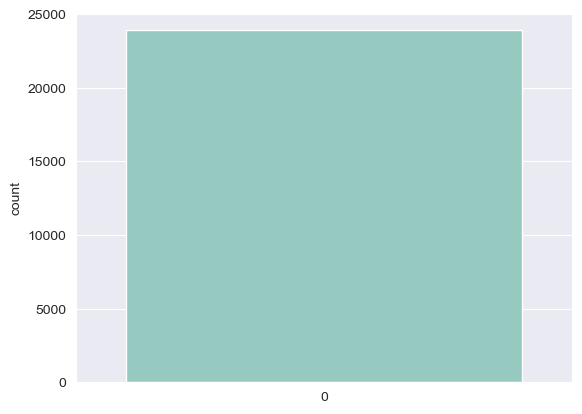

In [37]:
plt.style.use("dark_background")
sns.set_style('darkgrid')
sns.countplot(df["Bad_label"])
plt.show()

* In this plot we are clearly seen the 90% Customer has Good credit and 10% customer are did not do has Good credit.
* This target feature is does not balance.

**EDA:**
* we can't do EDA with this dataset because most of the columns name are hide because of security propose but we are going to do EDA with possible columns which can give us perfect insights.
* Now,lets start EDA after that we are going to change categorical variable into numerical variables.

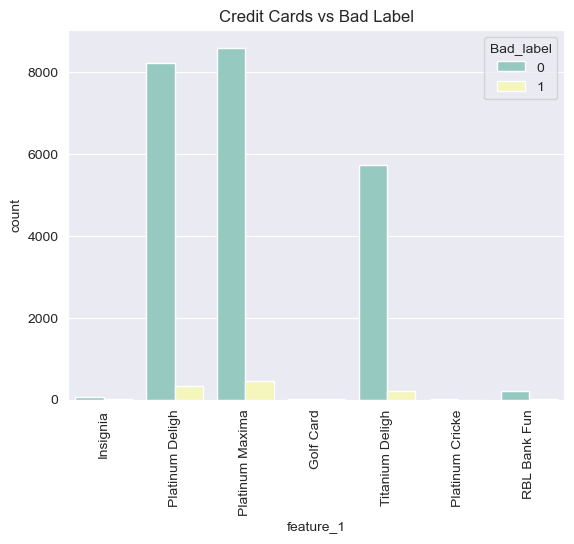

In [47]:
sns.countplot(data=df,x="feature_1",hue="Bad_label")
plt.title("Credit Cards vs Bad Label")
plt.xticks(rotation=90)
plt.show()

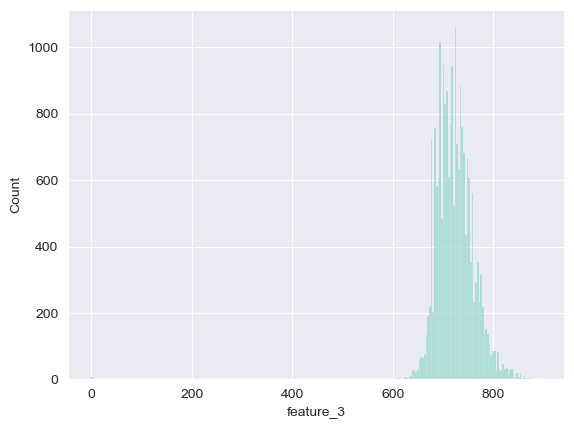

In [48]:
sns.histplot(data=df,x="feature_3")
plt.show()

Insights
 - Most of the customers have good credit score

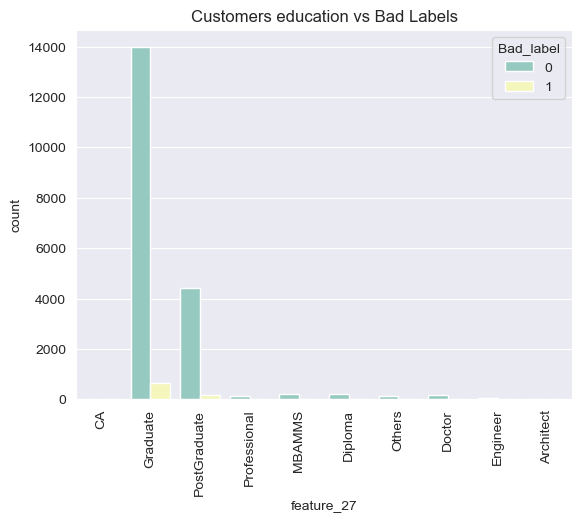

In [49]:
sns.countplot(data=df,x="feature_27",hue="Bad_label")
plt.title("Customers education vs Bad Labels")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.

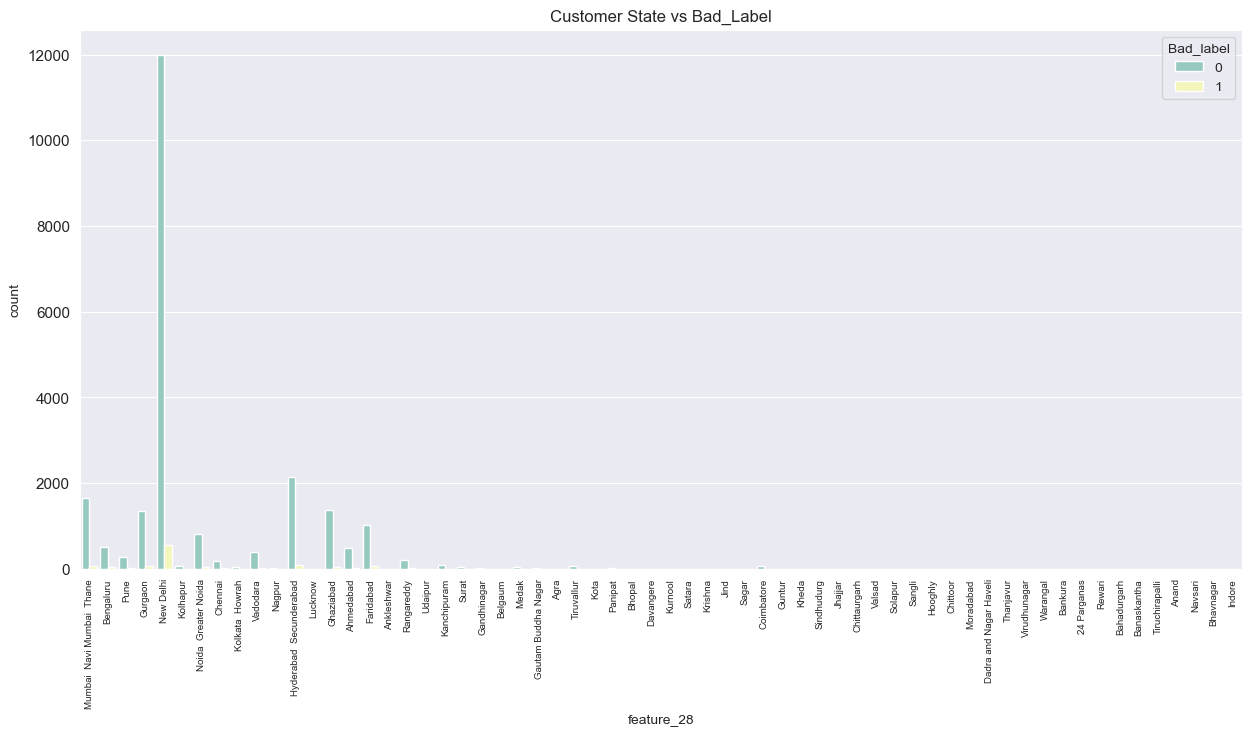

In [56]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.countplot(data=df,x="feature_28",hue="Bad_label")
plt.title("Customer State vs Bad_Label")
plt.xticks(fontsize=7,rotation=90)
plt.yticks(fontsize=11)
plt.show()

**Insights**
- Most of the Customers belong from New Delhi.

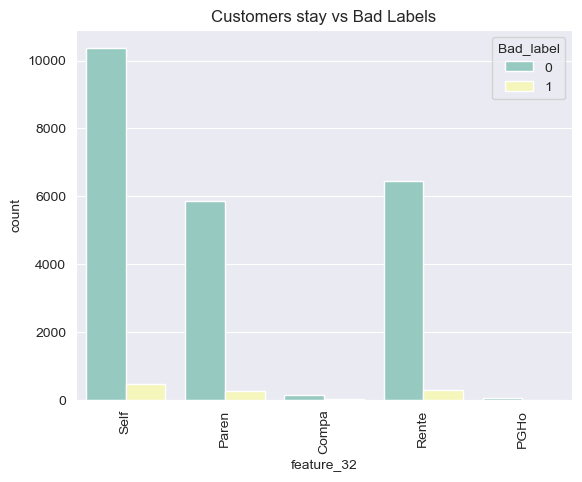

In [57]:
sns.countplot(data=df,x="feature_32",hue="Bad_label")
plt.title("Customers stay vs Bad Labels")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Most of the customers who has crdit cards they stay at their own house.

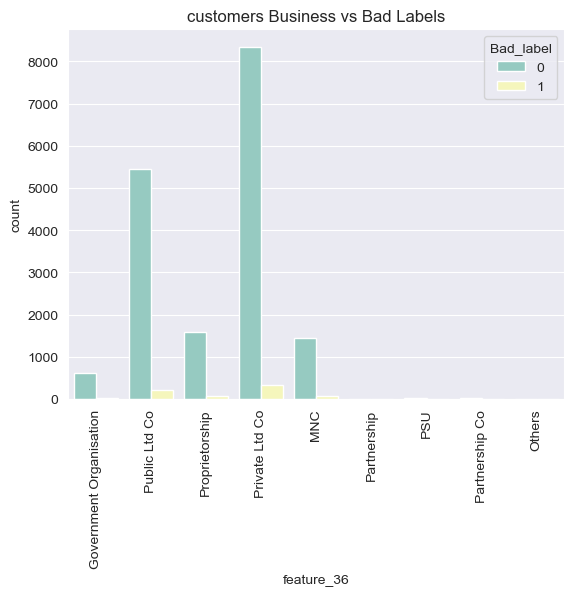

In [51]:
sns.countplot(data=df,x="feature_36",hue="Bad_label")
plt.title("customers Business vs Bad Labels")
plt.xticks(rotation=90)
plt.show()

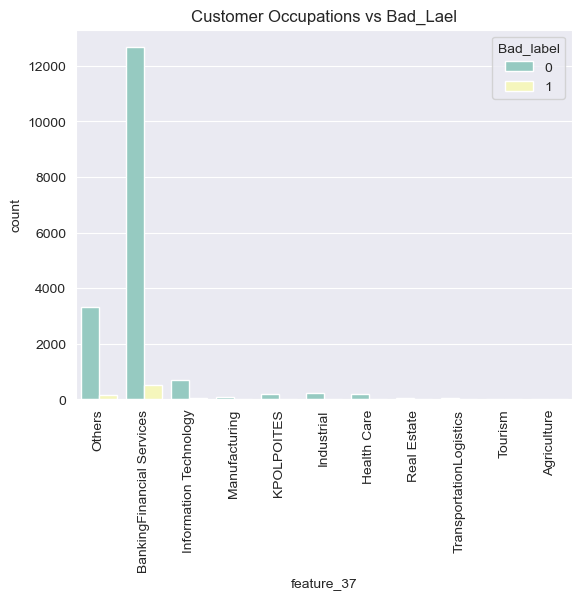

In [59]:
sns.countplot(data=df,x="feature_37",hue="Bad_label")
plt.title("Customer Occupations vs Bad_Lael")
plt.xticks(rotation=90)
plt.show()

**Insights**
- Most chance of that Customers who doing job in Banking/Financial services they taking credit card

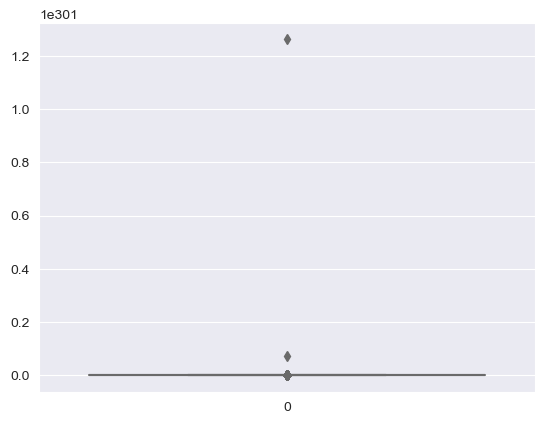

In [60]:
sns.boxplot(df.high_credit_amt)
plt.show()

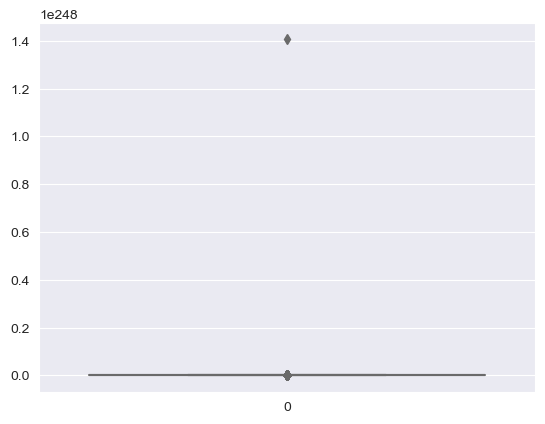

In [62]:
sns.boxplot(df.cur_balance_amt)
plt.show()

**Final Conclusions of Insights**
* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score.
* Most of the customers have good credit score.
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.
* Most of the Customers belong from New Delhi.
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.
* Most of the customers who has crdit cards they stay at their on home.

**Data Preprocessing:**

In [63]:
pd.set_option("display.max_rows",None)
df.isnull().sum()/len(df)*100

Unnamed: 0           0.000000
dt_opened            0.000000
customer_no          0.000000
entry_time           0.062772
feature_1            0.062772
feature_2           11.868095
feature_3           11.868095
feature_4            0.062772
feature_5            0.062772
feature_6            0.062772
feature_7            0.062772
feature_11           0.062772
feature_12           0.062772
feature_15           0.096250
feature_16           0.112990
feature_19           0.062772
feature_20           0.000000
feature_21           0.062772
feature_22           0.000000
feature_23           0.062772
feature_24           2.678273
feature_25           0.062772
feature_26           0.062772
feature_27          15.220121
feature_28           0.062772
feature_29           0.062772
feature_30           0.062772
feature_31           0.062772
feature_32           0.062772
feature_33           0.062772
feature_34           0.062772
feature_35           0.062772
feature_36          23.778038
feature_37

* In this data set most of the feature contain missing     value with including unique feature.
* Numerical feature missing value impute with               Median/Mean.
* Categorical feature missing value impute with  mode.

In [64]:
df1 =['feature_8','feature_9','feature_10','feature_13','feature_14','feature_17','feature_18','feature_38','feature_45',
'feature_49','feature_51','feature_53','feature_57','feature_61','feature_73','feature_74','amt_past_due']
df.drop(df1,axis=1,inplace=True)


KeyboardInterrupt



* 17 Features has more than 15% to 90% missing value and some unique feature also contain missing value so we drop this feature.
* Remaining feature missing value is less than 15% so we impute the missing value.

In [65]:
df.isnull().sum().sum()

50104

In [66]:
n_data = df.describe().T
n_data

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23896.0,1.194750e+04,6.898325e+03,0.0,5973.75,11947.5,17921.25,2.389500e+04
customer_no,23896.0,1.194850e+04,6.898325e+03,1.0,5974.75,11948.5,17922.25,2.389600e+04
feature_3,21060.0,7.232359e+02,3.731868e+01,-1.0,698.00,721.0,745.00,8.960000e+02
feature_4,23881.0,2.321595e+00,8.928375e-01,1.0,1.00,3.0,3.00,3.000000e+00
feature_6,23881.0,1.400000e+01,0.000000e+00,14.0,14.00,14.0,14.00,1.400000e+01
feature_7,23881.0,1.190705e+05,7.752349e+04,0.0,72000.00,104000.0,139000.00,1.217000e+06
feature_19,23881.0,1.049412e+00,2.167305e-01,1.0,1.00,1.0,1.00,2.000000e+00
feature_25,23881.0,1.233910e+00,4.233244e-01,1.0,1.00,1.0,1.00,2.000000e+00
feature_26,23881.0,7.256396e-01,1.124986e+00,0.0,0.00,0.0,2.00,1.000000e+01
feature_29,23881.0,2.176202e+05,1.592671e+05,110001.0,110051.00,110094.0,390002.00,7.122450e+05


In [67]:
c_data = df.describe(include="O").T
c_data

,count,unique,top,freq
dt_opened,23896,197,16Nov15,699
entry_time,23881,296,19Oct15,180
feature_1,23881,7,Platinum Maxima,9056
feature_2,21060,281,19Oct15,182
feature_5,23881,1,Card Setup,23881
feature_11,23881,2,Y,22611
feature_12,23881,16,PM1,8853
feature_15,23873,364,SA03,9331
feature_16,23869,522,AS19,1374
feature_20,23896,10610,AXMPKXXXXX,16


**Numerical :-**
* median(use fillna function to impute Numerical value)

In [68]:
df.describe().columns

Index(['Unnamed: 0', 'customer_no', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78', 'Bad_label', 'customer_no.1', 'total_enqu_count',
       'total_enq_amt'],
      dtype='object')

In [69]:
num_col = df[[ 'customer_no', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78']]

In [70]:
num_col.head()

,customer_no,feature_3,feature_4,feature_6,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,1,650.0,2.0,14.0,500000.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0
1,2,760.0,1.0,14.0,1200000.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0
2,3,774.0,1.0,14.0,700000.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0
3,4,770.0,1.0,14.0,500000.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0
4,5,NaN,3.0,14.0,500000.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0


In [71]:
df[num_col.columns] = df[num_col.columns].fillna(df[num_col.columns].median())

* Impute missing value using median because disribution is not normal.

**Categorical :-**
* mode(use fillna function to impute categorical value)

In [72]:
df.describe(include="O").columns

Index(['dt_opened', 'entry_time', 'feature_1', 'feature_2', 'feature_5',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_43', 'feature_46', 'feature_47', 'feature_48', 'feature_50',
       'feature_54', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_75', 'feature_77',
       'feature_79', 'high_credit_amt', 'cur_balance_amt', 'cashlimit',
       'creditlimit'],
      dtype='object')

In [73]:
cate_columns = df[['entry_time', 'feature_1', 'feature_2', 'feature_5',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_28', 'feature_33', 'feature_36', 'feature_37',
       'feature_43', 'feature_46', 'feature_47', 'feature_48', 'feature_50',
       'feature_54', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_75', 'feature_77',
       'feature_79', 'high_credit_amt', 'cur_balance_amt', 'cashlimit',
       'creditlimit']]

In [74]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

* Now categorial columns are converted to numerical columns*

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        23896 non-null  int64  
 1   dt_opened         23896 non-null  int32  
 2   customer_no       23896 non-null  int64  
 3   entry_time        23896 non-null  int32  
 4   feature_1         23896 non-null  int32  
 5   feature_2         23896 non-null  int32  
 6   feature_3         23896 non-null  float64
 7   feature_4         23896 non-null  float64
 8   feature_5         23896 non-null  int32  
 9   feature_6         23896 non-null  float64
 10  feature_7         23896 non-null  float64
 11  feature_11        23896 non-null  int32  
 12  feature_12        23896 non-null  int32  
 13  feature_15        23896 non-null  int32  
 14  feature_16        23896 non-null  int32  
 15  feature_19        23896 non-null  float64
 16  feature_20        23896 non-null  int32 

**Outlier Detection:**

In [76]:
def cal_out_percentage(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    
    outliers = ( (column <(q1-1.5*IQR))  | (column >(q3+1.5*IQR)) )
    outlier_percentaege = (outliers.sum()/len(column))*100
    return outlier_percentaege
outlier_percentage = df.apply(cal_out_percentage)
print(outlier_percentage)

Unnamed: 0           0.000000
dt_opened            0.000000
customer_no          0.000000
entry_time           0.000000
feature_1            0.000000
feature_2            0.000000
feature_3            2.230499
feature_4            0.000000
feature_5            0.062772
feature_6            0.000000
feature_7            6.047037
feature_11           5.377469
feature_12           0.096250
feature_15           3.954637
feature_16           0.000000
feature_19           4.938065
feature_20           0.000000
feature_21           0.000000
feature_22           0.000000
feature_23           9.909608
feature_24           0.000000
feature_25          23.376297
feature_26           0.138098
feature_27           0.008370
feature_28           0.000000
feature_29           0.000000
feature_30           0.000000
feature_31          10.738199
feature_32           0.000000
feature_33          18.488450
feature_34          23.715266
feature_35           2.284901
feature_36           9.014061
feature_37

**Feature Selection:**
    - Drop unique and constant features

In [77]:
df.drop(['Unnamed: 0','dt_opened','entry_time','feature_5','feature_20','feature_22','feature_47','feature_54','feature_77','customer_no.1',],axis=1,inplace=True)

* In this dataset unique column available, so im drop this column
* Remove unwanted columns like ids,date,time. 

**Split the Dataset into trian_test**

In [78]:
from sklearn.model_selection import train_test_split
x = df.drop(["Bad_label"],axis=1)
y = df["Bad_label"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,
                                                 test_size=0.2,
                                                 random_state=42)

**Heatmap : Correlation checking**
-  A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

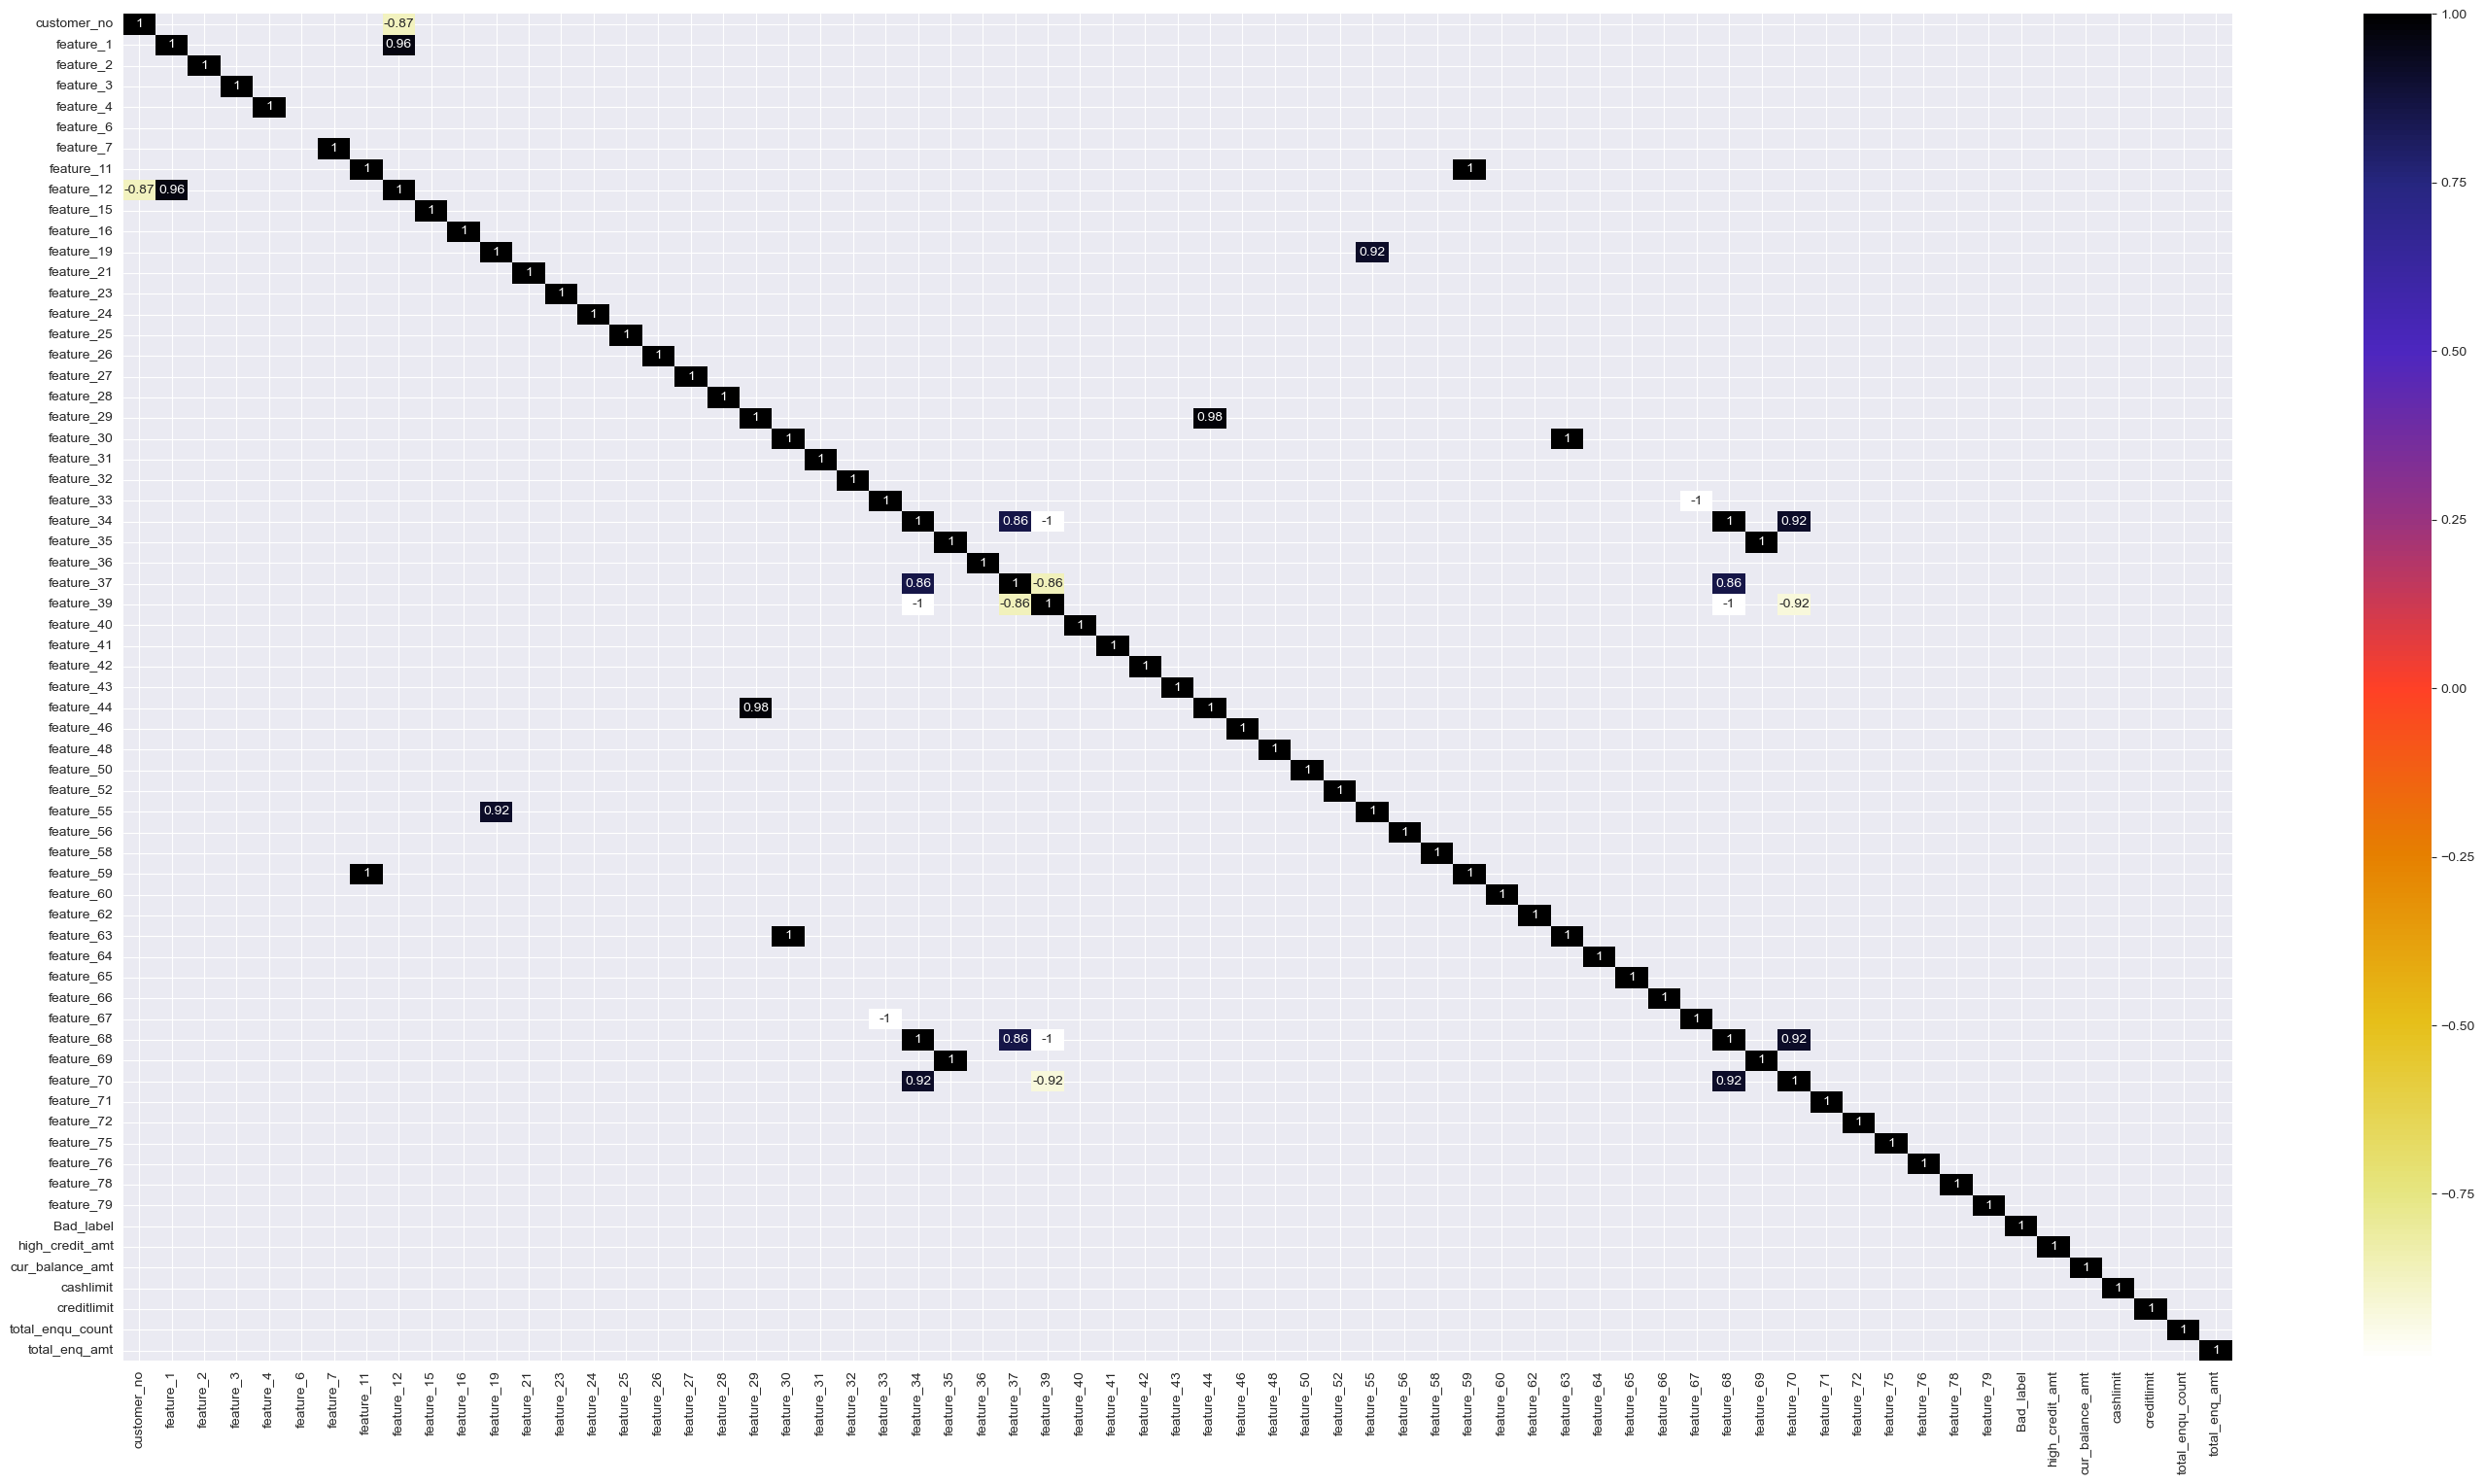

In [79]:
plt.figure(figsize=(35,18))
sns.set_style("darkgrid")
corr = df.corr()
sns.heatmap(corr[(corr>0.85)|(corr<-0.85)],annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data
* But we confirm with the help of simple code

In [80]:
def correlation(dataset,threshold):
    col_corr=set()                                  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: 
                colname = corr_matrix.columns[i]     
                col_corr.add(colname)
    return col_corr

In [81]:
corr_features = correlation(x_train,0.80)
len(set(corr_features))

13

In [82]:
pd.DataFrame(corr_features)

,0
0,feature_55
1,feature_70
2,feature_1
3,feature_44
4,feature_79
5,feature_67
6,feature_39
7,feature_69
8,feature_59
9,feature_68


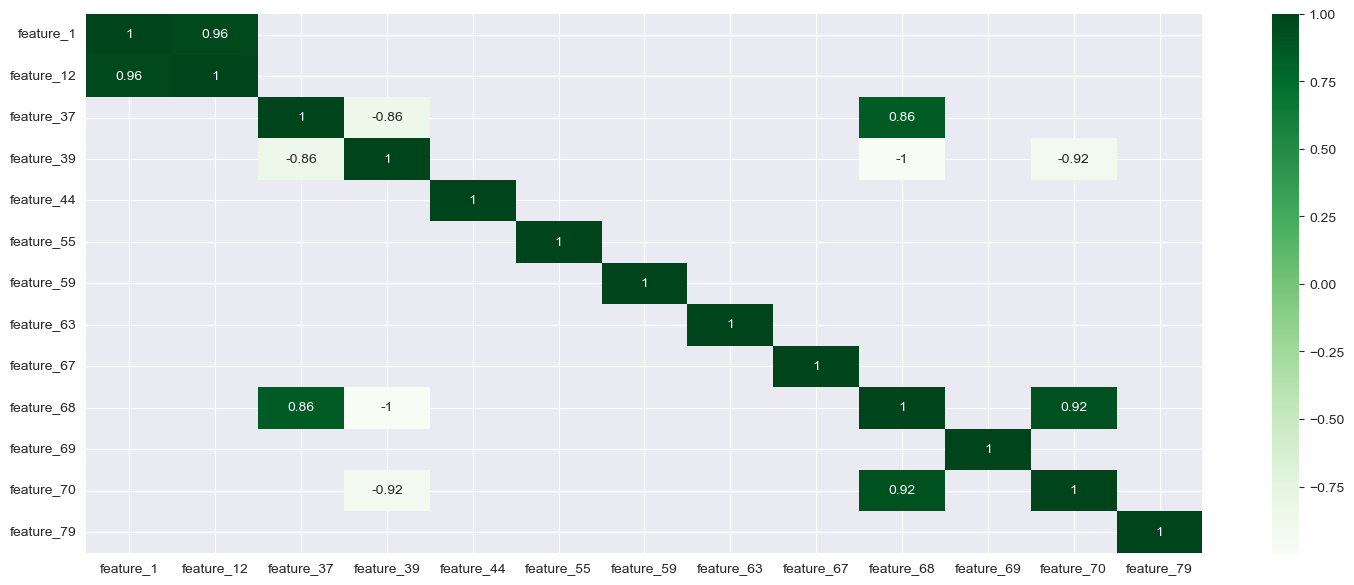

In [83]:
n = df[['feature_1','feature_12','feature_37','feature_39','feature_44','feature_55','feature_59',
        'feature_63','feature_67','feature_68','feature_69','feature_70','feature_79']].corr()
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.heatmap(n[(n>0.80)|(n<-0.80)],annot=True,cmap="Greens")
plt.show()

* Here we are going to drop highly correlated feature.

In [84]:
x_train.drop(['feature_1','feature_12','feature_37','feature_39','feature_44','feature_55','feature_59',
        'feature_63','feature_67','feature_68','feature_69','feature_70','feature_79'],axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [85]:
df.duplicated().sum()

0

**Feature scaling:** *Robust Scaler*
- Robust scaler are robust to outlier. it is used to sacled the feature to median and quantile scaling

In [87]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
xtr_scaled = scaler.fit_transform(x_train)
xte_scaled = scaler.transform(x_test)

#### BALANCING THE TARGET COLUMN USING SMOTE

In [88]:
y.value_counts(normalize=True)*100

Bad_label
0    95.79846
1     4.20154
Name: proportion, dtype: float64

In [92]:
import warnings as wn
wn.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=42)
xtr_smote,ytr_smote=sm.fit_resample(xtr_scaled,y_train)

In [93]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(ytr_smote))

Actual Classes Counter({0: 18310, 1: 806})
SMOTE Classes Counter({0: 18310, 1: 18310})


**Model Creation:**
- Create a sweet spots model low bias and low variance model
- Improve accuracy score

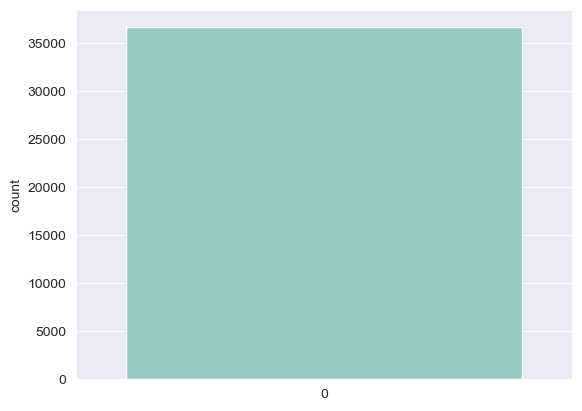

In [94]:
sns.countplot(ytr_smote)
plt.show()

**Model Creations:**

**1.LR Model:**

In [95]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(xtr_scaled,y_train)

LogisticRegression()

In [102]:
lrte_pred = lr_model.predict(xte_scaled)
lrtr_pred = lr_model.predict(xtr_scaled)

*Training score:*

In [103]:
from sklearn.metrics import  accuracy_score,recall_score,f1_score,classification_report,accuracy_score,roc_auc_score
print(classification_report(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18310
           1       0.00      0.00      0.00       806

    accuracy                           0.96     19116
   macro avg       0.48      0.50      0.49     19116
weighted avg       0.92      0.96      0.94     19116

0.9577840552416823


*Testing score:*

In [104]:
print(classification_report(y_test,lrte_pred))
print(accuracy_score(y_test,lrte_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780

0.9585774058577405


* Logisticregression classifier  model  is well work on training and testing side.

**Use bagging on logistic regression model:**

In [105]:
lr_model1 = LogisticRegression()
from sklearn.ensemble import BaggingClassifier
bcr_model = BaggingClassifier(base_estimator=lr_model1,
                             n_estimators=45)
bcr_model.fit(x_train,y_train)
bcr_predict = bcr_model.predict(x_test)

In [106]:
bcr_recall = accuracy_score(bcr_predict,y_test)
print("Recall score after bagginn:",bcr_recall)

Recall score after bagginn: 0.9585774058577405


**2.KNN Model**

In [115]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))
print("Error rate:",error_rate)

Error rate: [0.044560669456066945, 0.04832635983263598, 0.04184100418410042, 0.042468619246861926, 0.04142259414225941, 0.04142259414225941, 0.04142259414225941, 0.04142259414225941, 0.04142259414225941]


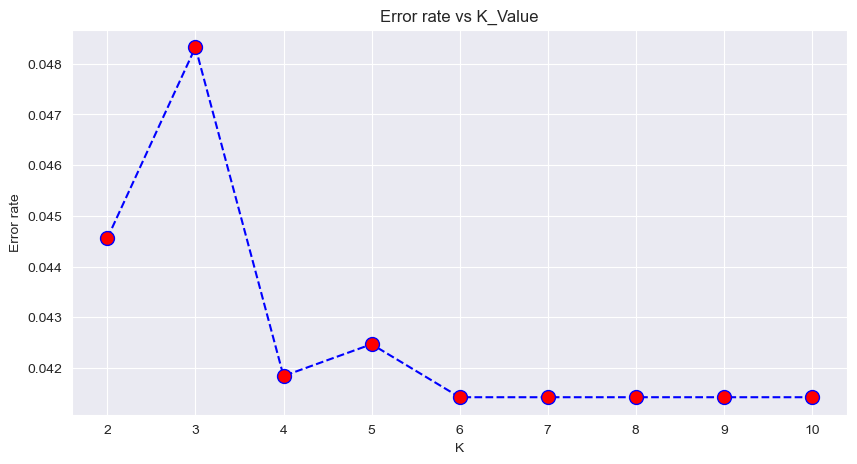

In [116]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title("Error rate vs K_Value")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.show()

In [127]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knnte_pred = knn_model.predict(x_test)
knntr_pred = knn_model.predict(x_train)

*Training score:*

In [128]:
print(classification_report(y_test,knnte_pred))
print(accuracy_score(y_test,knnte_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4582
           1       0.05      0.01      0.02       198

    accuracy                           0.95      4780
   macro avg       0.51      0.50      0.50      4780
weighted avg       0.92      0.95      0.94      4780

0.951673640167364


*Testing score:*

In [129]:
print(classification_report(y_train,knntr_pred))
print(accuracy_score(y_train,knntr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18310
           1       0.71      0.12      0.20       806

    accuracy                           0.96     19116
   macro avg       0.84      0.56      0.59     19116
weighted avg       0.95      0.96      0.95     19116

0.960818162795564


**3.Decision Tree Classifier:**

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
dtcte_pred = dtc_model.predict(x_test)
dtctr_pred = dtc_model.predict(x_train)

*Testing score:*

In [121]:
print(classification_report(y_test,dtcte_pred))
print(accuracy_score(y_test,dtcte_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4582
           1       0.07      0.10      0.08       198

    accuracy                           0.91      4780
   macro avg       0.52      0.52      0.52      4780
weighted avg       0.92      0.91      0.92      4780

0.9131799163179917


*Training score:*

In [122]:
print(classification_report(y_train,dtctr_pred))
print(accuracy_score(y_train,dtctr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18310
           1       1.00      1.00      1.00       806

    accuracy                           1.00     19116
   macro avg       1.00      1.00      1.00     19116
weighted avg       1.00      1.00      1.00     19116

1.0


**4.Random Forest Classifier:**

In [123]:
from sklearn.ensemble import RandomForestClassifier 
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
rfcte_pred = rfc_model.predict(x_test)
rfctr_pred = rfc_model.predict(x_train)

*Testing score:*

In [131]:
print(classification_report(y_test,rfcte_pred))
print(accuracy_score(y_test,rfcte_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780

0.9585774058577405


*Training score:*

In [134]:
print(classification_report(y_train,rfctr_pred))
print(accuracy_score(y_train,rfctr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18310
           1       1.00      1.00      1.00       806

    accuracy                           1.00     19116
   macro avg       1.00      1.00      1.00     19116
weighted avg       1.00      1.00      1.00     19116

0.9999476878007951


**5.Gradient Boosting Classifier:**

In [132]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc_model =GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [133]:
gbcte_pred = gbc_model.predict(x_test)
gbctr_pred = gbc_model.predict(x_train)

*Testing score:*

In [134]:
print(classification_report(y_test,gbcte_pred))
print(accuracy_score(y_test,rfcte_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780

0.9585774058577405


*Training score:*

In [136]:
print(classification_report(y_train,gbctr_pred))
print(accuracy_score(y_train,gbctr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18310
           1       1.00      0.03      0.05       806

    accuracy                           0.96     19116
   macro avg       0.98      0.51      0.51     19116
weighted avg       0.96      0.96      0.94     19116

0.9589349236241892


**6.XGB Classifier:**

In [137]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()
xgbc_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
xgbcte_pred = xgbc_model.predict(x_test)
xgbctr_pred = xgbc_model.predict(x_train)

*Testing scores:*

In [140]:
print(classification_report(y_test,xgbcte_pred))
print(accuracy_score(y_test,xgbcte_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780

0.9581589958158996


*Training score:*

In [141]:
print(classification_report(y_train,xgbctr_pred))
print(accuracy_score(y_train,xgbctr_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18310
           1       1.00      0.82      0.90       806

    accuracy                           0.99     19116
   macro avg       1.00      0.91      0.95     19116
weighted avg       0.99      0.99      0.99     19116

0.9923624189160912


**7.Artifical Neural Network:**

In [142]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [143]:
# Predicting the Probability:
mlp_predict = model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
mlpte_pred = model.predict(x_test)
mlptr_pred = model.predict(x_train)

*Testing score:*

In [145]:
print(classification_report(y_test,mlpte_pred))
print(accuracy_score(y_test,mlpte_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780

0.9585774058577405


*Training score:*

In [146]:
print(classification_report(y_train,mlptr_pred))
print(accuracy_score(y_train,mlptr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18310
           1       0.00      0.00      0.00       806

    accuracy                           0.96     19116
   macro avg       0.48      0.50      0.49     19116
weighted avg       0.92      0.96      0.94     19116

0.9578363674408872


**Observation:**
* Logisticregression classifier model is well work on training data as well as testing data And The score of training and    testing data is 96 %. But im also apply bagging model. After apply bagging score is (After bagging score = 95%).

* KNeighboursClassifier model is slightly perform well accuracy on training data as well as testing data. The score of training   and testing data with respect to 95% & 96%.

* Decision Tree Classifeir model is very well work on training data and The score of training data is 100% .Testing data is       also good and testing score is 91%.

* Random Forest Classifier model is also very well work on training data and The score of training data is 100% .Testing data is   also good and testing score is 96%.

* Geadient Boosting Classifier model is good work on training and teasting data. it's score is also same like training & testing score is 96%.

* XGB Classifier model is perform well accuracy on training data as well as testing data. The score of training and testing data   with respect to 99% & 96% .

* ANN model also perform well on training as well as testing data and the score is 96% Percentage.

*Conclusion:*
**From above all model Im select Lr Model,GBC Model & ANN Model classifier beacuse this model perform well on training as well as testing side and low variance and low bias model**

**Report on Challenges faced**
- Huge amount of data : this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run any cells.

- Choosing columns for training model : this dataset has 105 columns and most of the columns having no variety in their values it was difficult to select important columns.

- Hiding columns names : this dataset has customers demographices tables which columns name are hiding for security purpose.it was difficult to understand what columns are saying because of this it was difficult to select important columns.

- No EDA : we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult to get insights from data.because of this we got problem while doing EDA.

In [150]:
# Model Saving:
import pickle
file = open("ANN_model.pkl","wb")
pickle.dump(model,file)

                        ---- END ------